In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)

In [ ]:
data = pd.read_csv("us_employmentdata.csv")

In [ ]:
df = data.copy()

In [ ]:
df.shape

(71, 12)

In [ ]:
df.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  71 non-null     int64  
 1   population            71 non-null     int64  
 2   labor_force           71 non-null     int64  
 3   population_percent    71 non-null     float64
 4   employed_total        71 non-null     int64  
 5   employed_percent      71 non-null     float64
 6   agrictulture_ratio    71 non-null     int64  
 7   nonagriculture_ratio  71 non-null     int64  
 8   unemployed            71 non-null     int64  
 9   unemployed_percent    71 non-null     float64
 10  not_in_labor          71 non-null     int64  
 11  footnotes             21 non-null     float64
dtypes: float64(4), int64(8)
memory usage: 6.8 KB


In [ ]:
df.nunique()

year                    70
population              71
labor_force             71
population_percent      44
employed_total          71
employed_percent        46
agrictulture_ratio      70
nonagriculture_ratio    71
unemployed              71
unemployed_percent      44
not_in_labor            71
footnotes                1
dtype: int64

In [ ]:
df[df.duplicated("year")]

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
7,1947,101827,59350,58.3,57038,56.0,7890,49148,2311,3.9,42477,NaN


The year 1947 is duplicated in employment dataset.


In [ ]:
df[df["year"] == 1947]

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
6,1947,106018,60168,56.8,57812,54.5,8256,49557,2356,3.9,45850,NaN
7,1947,101827,59350,58.3,57038,56.0,7890,49148,2311,3.9,42477,NaN


The year 1947 is duplicated in this dataset at row 6,7 so the year is duplicated we have to delete the one row from 6 or 7 ,i'll be deleting te row no 6 because it contains less no of records.

In [ ]:
df1 = df.drop(df.index[6]).reset_index(drop=True).copy()

In [ ]:
df1.nunique()

year                    70
population              70
labor_force             70
population_percent      43
employed_total          70
employed_percent        46
agrictulture_ratio      69
nonagriculture_ratio    70
unemployed              70
unemployed_percent      44
not_in_labor            70
footnotes                1
dtype: int64

In [ ]:
df1.shape

(70, 12)

In [ ]:
for feature in df1.columns:
  print(feature," : ",df1[feature].isnull().sum())

year  :  0
population  :  0
labor_force  :  0
population_percent  :  0
employed_total  :  0
employed_percent  :  0
agrictulture_ratio  :  0
nonagriculture_ratio  :  0
unemployed  :  0
unemployed_percent  :  0
not_in_labor  :  0
footnotes  :  49


In [ ]:
df.footnotes.unique()

array([nan,  1.])

In [ ]:
df1.drop(columns="footnotes",inplace=True)

The column footnotes contains nan and 1.0 values so this column does not give any important information abot the population so we are dropping this column.

In [ ]:
df1.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230


In [ ]:
for feature in df1.columns:
  print(feature," : ",df1[feature].dtype)

year  :  int64
population  :  int64
labor_force  :  int64
population_percent  :  float64
employed_total  :  int64
employed_percent  :  float64
agrictulture_ratio  :  int64
nonagriculture_ratio  :  int64
unemployed  :  int64
unemployed_percent  :  float64
not_in_labor  :  int64


In [ ]:
df1.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230


In [ ]:
df1.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230


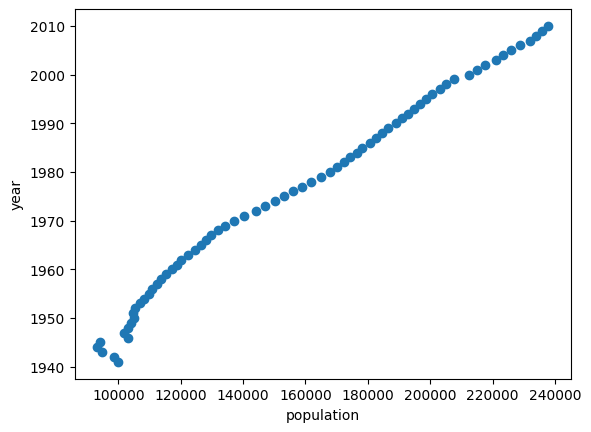

In [ ]:
plt.scatter(df1["population"],df1["year"])
plt.xlabel("population")
plt.ylabel("year")
plt.show()

As the above plot suggests that the as the year is increasing the population is also increasing.

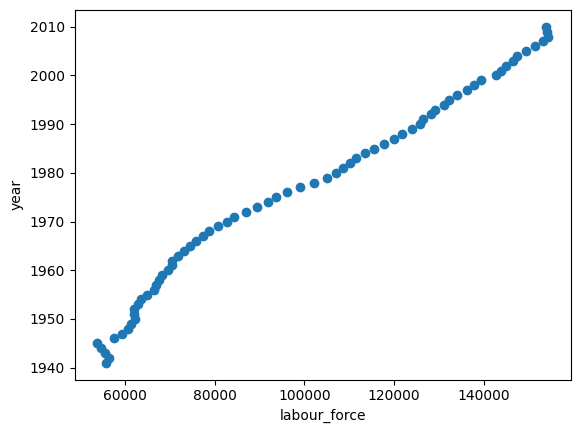

In [ ]:
plt.scatter(df1["labor_force"],df1["year"])
plt.xlabel("labour_force")
plt.ylabel("year")
plt.show()

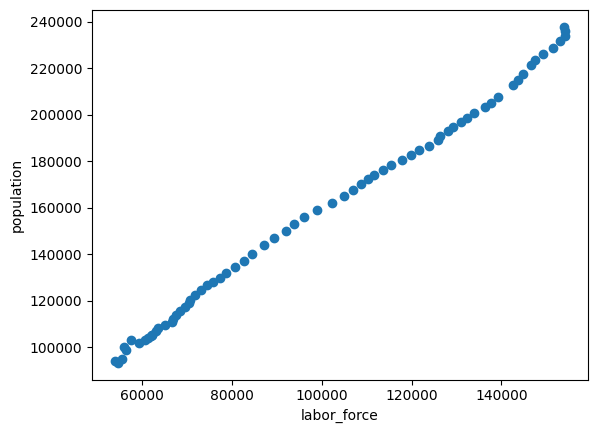

In [ ]:
plt.scatter(df1["labor_force"],df1["population"])
plt.ylabel("population")
plt.xlabel("labor_force")
plt.show()

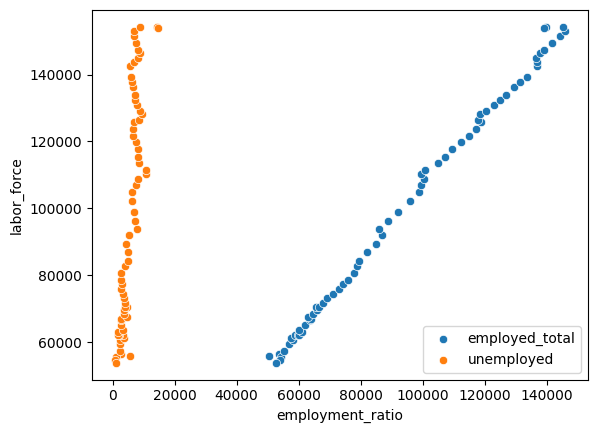

In [ ]:
fig,ax = plt.subplots()
sns.scatterplot(data = df1, y="labor_force",x="employed_total",ax=ax,label="employed_total")
sns.scatterplot(data=df1, y="labor_force",x="unemployed",ax=ax,label="unemployed")
plt.xlabel("employment_ratio")
plt.ylabel("labor_force")
plt.legend()
plt.show()


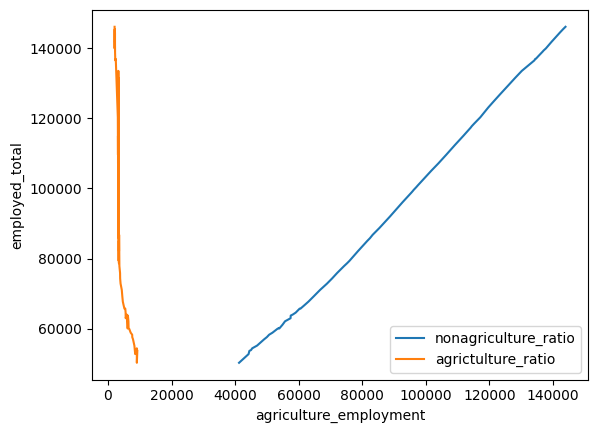

In [ ]:
from re import X
fig,ax =plt.subplots()
sns.lineplot(data=df1,y="employed_total",x="nonagriculture_ratio",ax= ax,label="nonagriculture_ratio")
sns.lineplot(data=df1,y="employed_total",x="agrictulture_ratio",ax= ax,label="agrictulture_ratio")
plt.xlabel("agriculture_employment")
plt.ylabel("employed_total")
plt.legend()
plt.show()

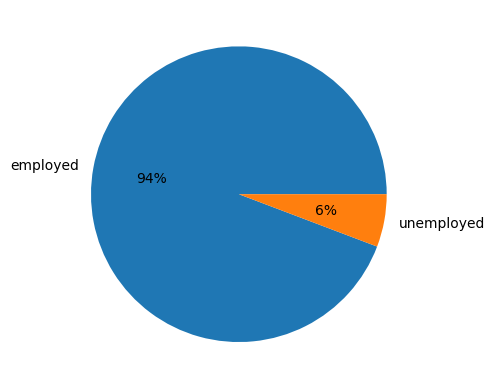

In [ ]:
employed_data = [df1["employed_total"].mean(),df1['unemployed'].mean()]
inner_data = [df1["nonagriculture_ratio"].mean(),df1['agrictulture_ratio'].mean()]
plt.pie([df1["employed_total"].mean(),df1['unemployed'].mean()],labels=["employed","unemployed"],autopct='%.0f%%')

plt.show()


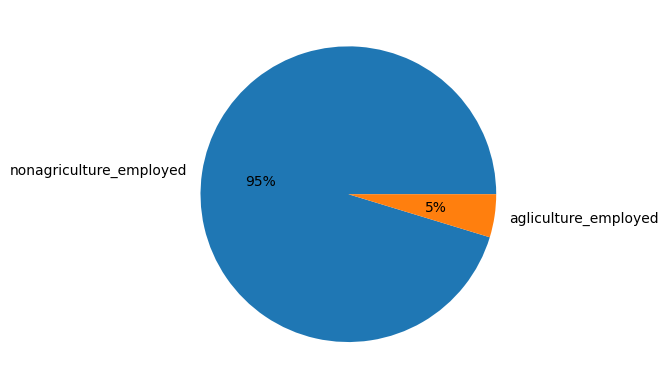

In [ ]:
plt.pie([df1["nonagriculture_ratio"].mean(),df1['agrictulture_ratio'].mean()],labels=["nonagriculture_employed","agliculture_employed"],autopct='%.0f%%')
plt.show()

In [ ]:
df1.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230


<Figure size 1500x1500 with 0 Axes>

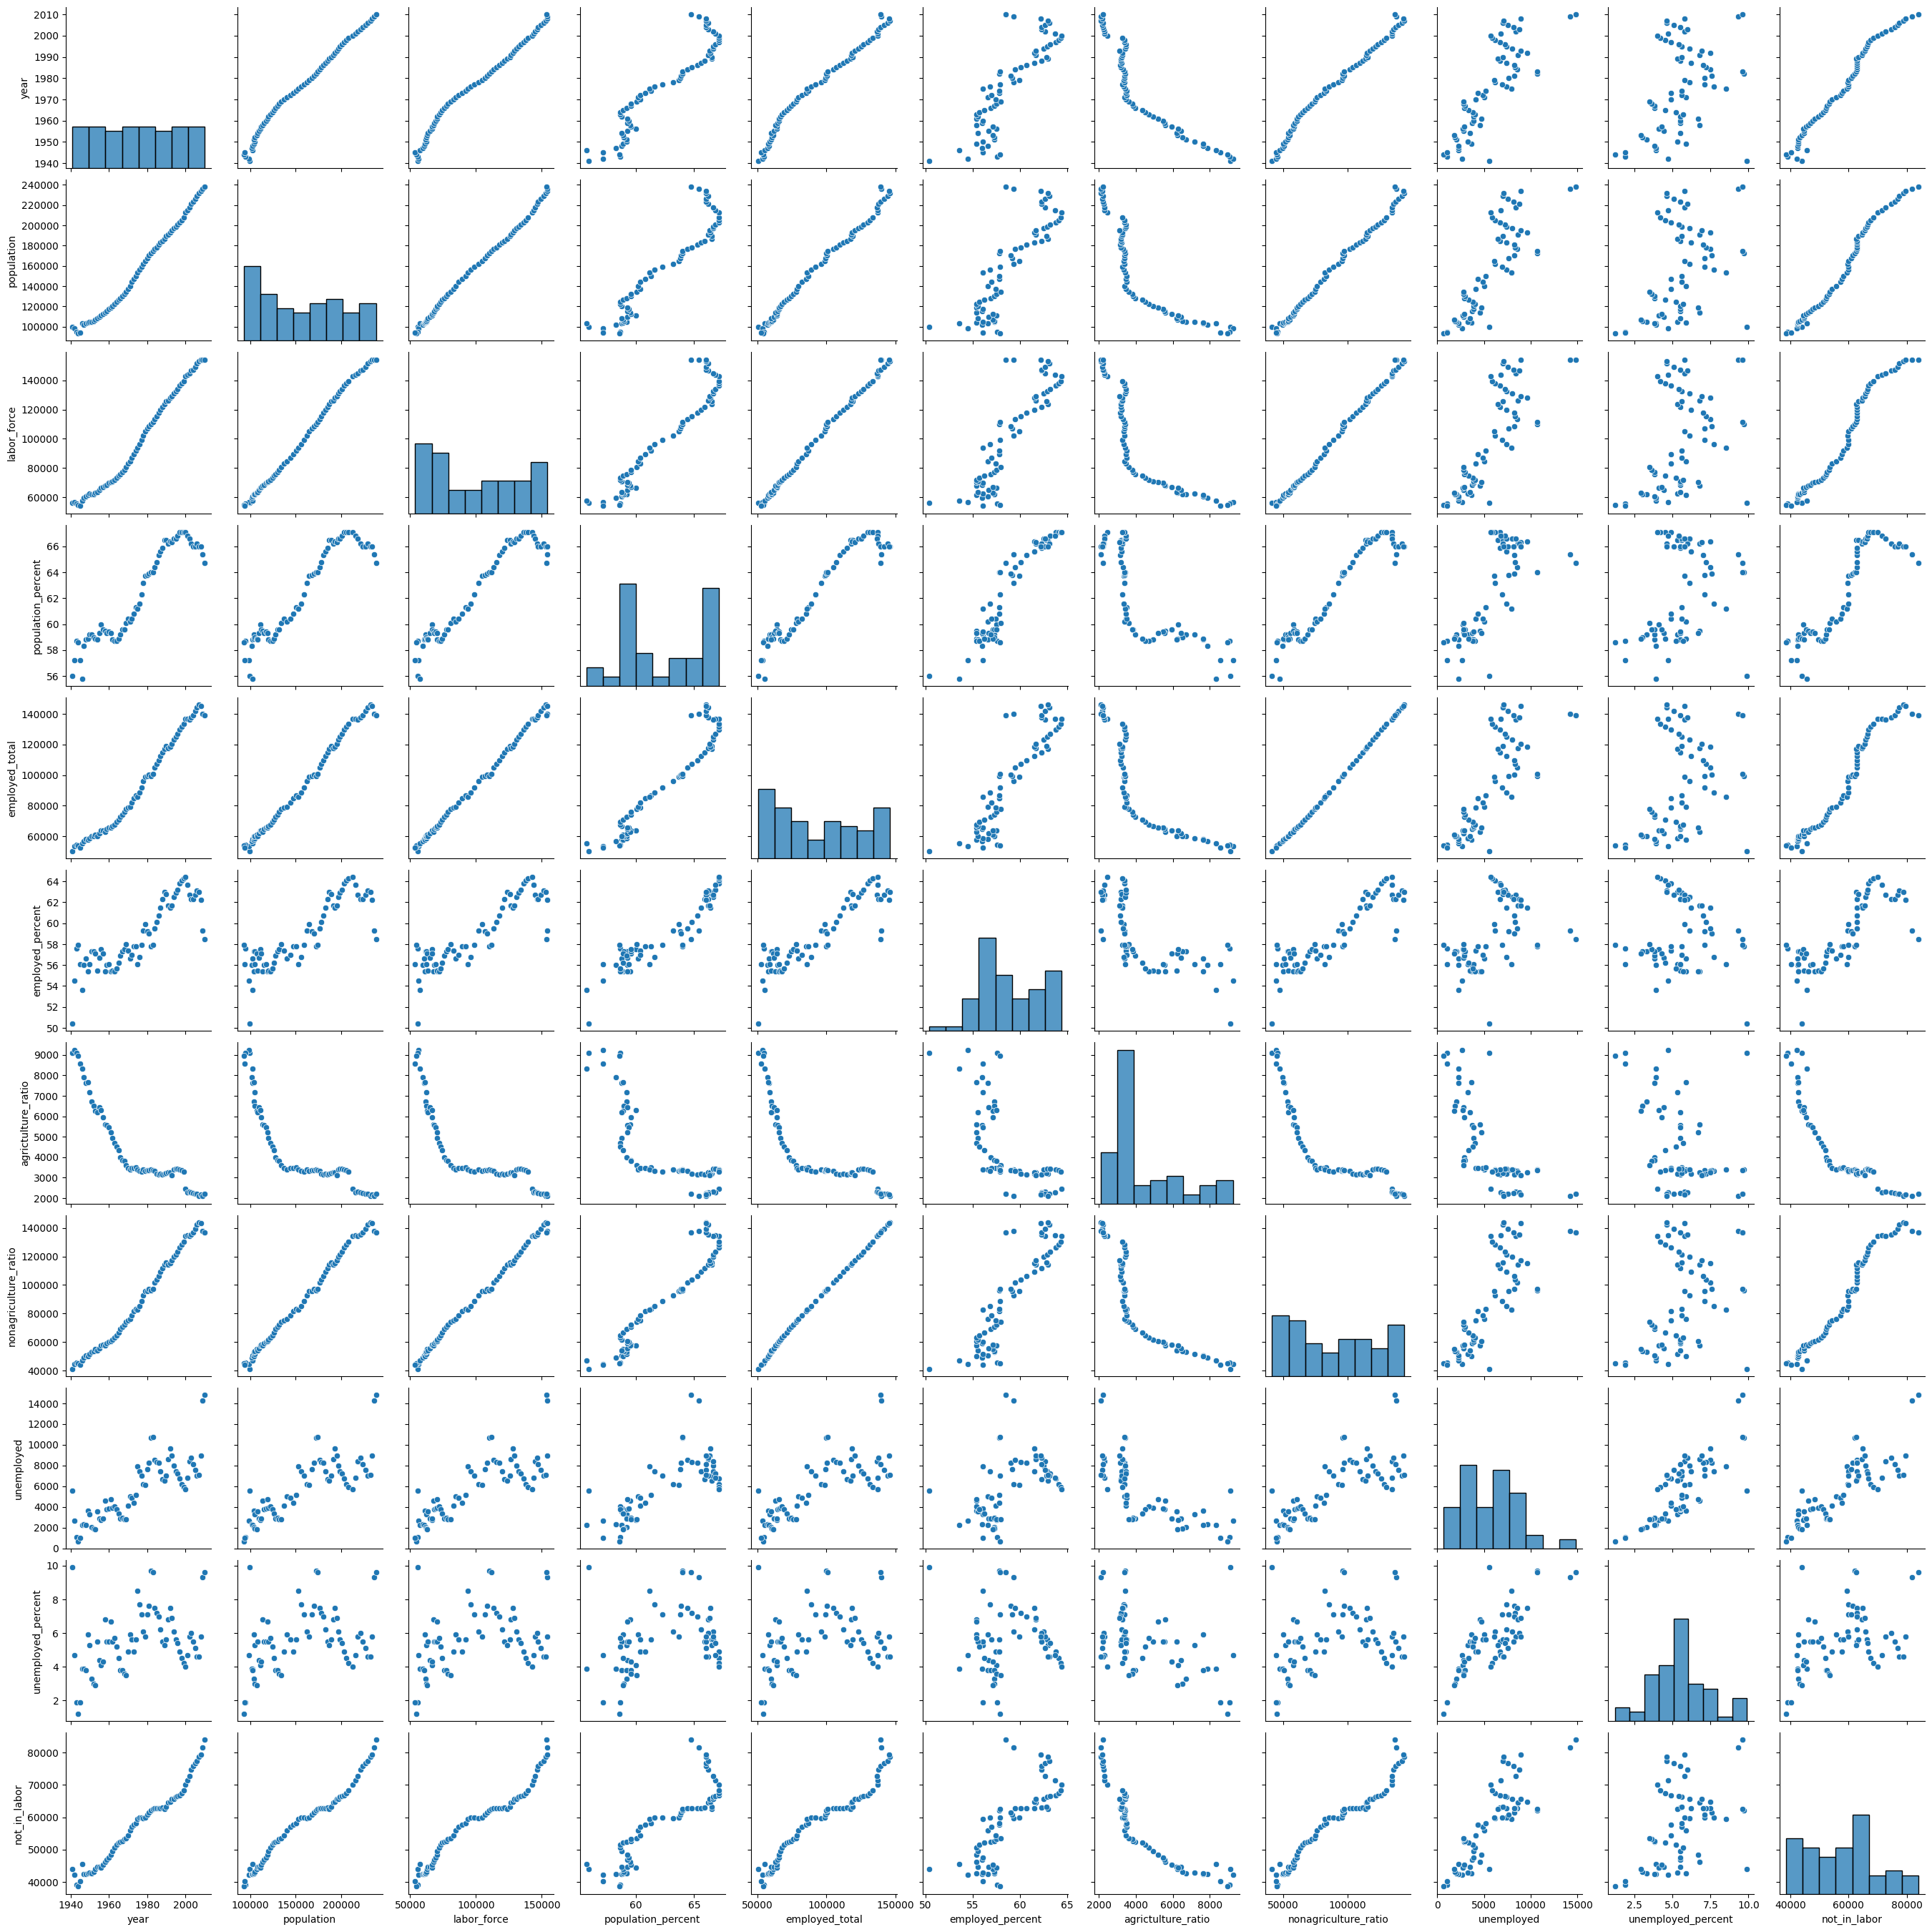

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df1)
plt.show()

In [ ]:
df1.corr()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor
year,1.000000,0.992750,0.989865,0.940752,0.987808,0.856070,-0.906351,0.992036,0.818424,0.383669,0.984181
population,0.992750,1.000000,0.998446,0.941806,0.995779,0.854034,-0.858852,0.996652,0.831727,0.392513,0.987554
labor_force,0.989865,0.998446,1.000000,0.956519,0.998515,0.876394,-0.844379,0.998349,0.820573,0.373817,0.977255
population_percent,0.940752,0.941806,0.956519,1.000000,0.957653,0.940137,-0.803590,0.957108,0.758082,0.323213,0.884422
employed_total,0.987808,0.995779,0.998515,0.957653,1.000000,0.895051,-0.839174,0.999434,0.788214,0.326109,0.971296
employed_percent,0.856070,0.854034,0.876394,0.940137,0.895051,1.000000,-0.697900,0.891253,0.509766,-0.017923,0.776543
agrictulture_ratio,-0.906351,-0.858852,-0.844379,-0.803590,-0.839174,-0.697900,1.000000,-0.856993,-0.734337,-0.419588,-0.885246
nonagriculture_ratio,0.992036,0.996652,0.998349,0.957108,0.999434,0.891253,-0.856993,1.000000,0.792278,0.334952,0.975086
unemployed,0.818424,0.831727,0.820573,0.758082,0.788214,0.509766,-0.734337,0.792278,1.000000,0.801394,0.849207
unemployed_percent,0.383669,0.392513,0.373817,0.323213,0.326109,-0.017923,-0.419588,0.334952,0.801394,1.000000,0.438670
